In [1]:
import pandas as pd
import librosa
from scipy.io import wavfile
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Generate Mel spectrograms (normalized and 128x128x3) for all audio files
waveform = []
genre = []
sr = []
rgb = []
for g in [
    "blues",
    "classical",
    "country",
    "disco",
    "hiphop",
    "jazz",
    "metal",
    "pop",
    "reggae",
    "rock",
]:
    for i in range(100):
        if g == "jazz" and i == 54:
            continue
            ## TODO: why does this file not work?
        fn = f"{i:05}"
        data, sample_rate = librosa.load(
            f"/Users/rishikarandev/Downloads/data/genres_original/{g}/{g}.{fn}.wav"
        )
        waveform.append(data)
        genre.append(g)
        sr.append(sample_rate)
        S = librosa.feature.melspectrogram(
            y=data, sr=sample_rate, n_mels=128, n_fft=2048, hop_length=512, fmax=8000
        )
        S_dB = librosa.power_to_db(S, ref=np.max)
        resized = cv2.resize(S_dB, (128, 128))
        S_norm = (resized - np.min(resized)) / (np.max(resized) - np.min(resized))
        # Apply a colormap (e.g., 'magma')
        colormap = plt.get_cmap("magma")
        S_rgb = colormap(S_norm)  # This returns an (128, 128, 4) array — RGBA
        # Drop the alpha channel to get (128, 128, 3)
        S_rgb = S_rgb[:, :, :3]
        rgb.append(S_rgb)

In [6]:
final_df = pd.DataFrame({"X": rgb, "y": genre, "sample_rate": sr})
final_df.head()

,X,y,sample_rate
0,"[[[0.857763, 0.279857, 0.415496], [0.908884, 0...",blues,22050
1,"[[[0.992196, 0.587502, 0.406299], [0.913354, 0...",blues,22050
2,"[[[0.722805, 0.217194, 0.473316], [0.779968, 0...",blues,22050
3,"[[[0.639216, 0.189921, 0.49415], [0.588158, 0....",blues,22050
4,"[[[0.457386, 0.127522, 0.507448], [0.366012, 0...",blues,22050


In [7]:
genre_names = [
    "blues",
    "classical",
    "country",
    "disco",
    "hiphop",
    "jazz",
    "metal",
    "pop",
    "reggae",
    "rock",
]

In [8]:
# One hot encode the genre labels
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
res = ohe.fit_transform(np.array(genre).reshape(-1, 1)).toarray()
res

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [9]:
res.shape

(999, 10)

In [ ]:
#Save original spectrogram data to npz. This file is too big and not on GH!
np.savez("../../100_data/test_spec.npz", X=rgb, y=res, genre_names=genre_names)

Visualization of Samples

In [10]:
df_ts = pd.DataFrame({"X": rgb, "y": genre, "waveform": waveform, "sample_rate": sr})
df_ts.loc[100, :]

X              [[[0.697098, 0.208501, 0.480835], [0.874176, 0...
y                                                      classical
waveform       [-0.020080566, -0.017486572, 0.004180908, 0.00...
sample_rate                                                22050
Name: 100, dtype: object

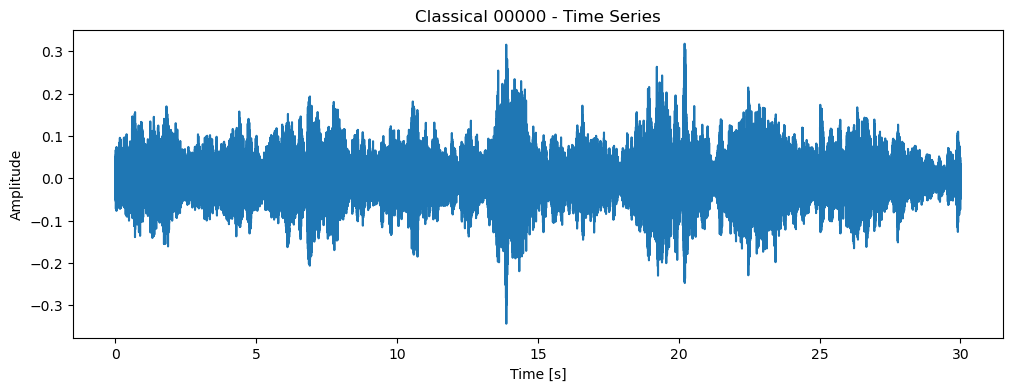

In [11]:
# To visualize a waveform for classical sample:
waveform, genre, sample_rate = (
    df_ts.loc[100]["waveform"],
    df_ts.loc[100]["y"],
    df_ts.loc[100]["sample_rate"],
)

duration = waveform.shape[0] / sample_rate
time = np.linspace(0.0, duration, waveform.shape[0])

# Plot the time series:
plt.figure(figsize=(12, 4))
plt.plot(time, waveform)
plt.title("Classical 00000 - Time Series")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

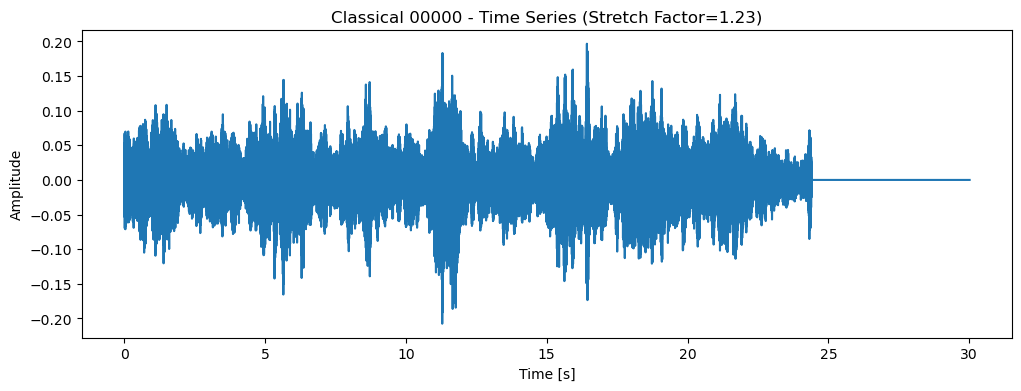

In [16]:
# To visualize time stretched waveform
def time_stretch_f(data, rate, target_len):
    """Stretch audio data by a given rate. Maintain audio length."""
    stretched = librosa.effects.time_stretch(data, rate=rate)
    if len(stretched) > target_len:
        return stretched[:target_len]
    else:
        return np.pad(stretched, (0, target_len - len(stretched)))


stretched = time_stretch_f(waveform, 1.23, len(waveform))

duration = waveform.shape[0] / sample_rate
time = np.linspace(0.0, duration, waveform.shape[0])

# Plot the time series:
plt.figure(figsize=(12, 4))
plt.plot(time, stretched)
plt.title("Classical 00000 - Time Series (Stretch Factor=1.23)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [10]:
df_ts.loc[400, :]

X              [[[0.979645, 0.491014, 0.367783], [0.99658, 0....
y                                                         hiphop
waveform       [-0.16915894, -0.021697998, 0.019561768, -0.07...
sample_rate                                                22050
Name: 400, dtype: object

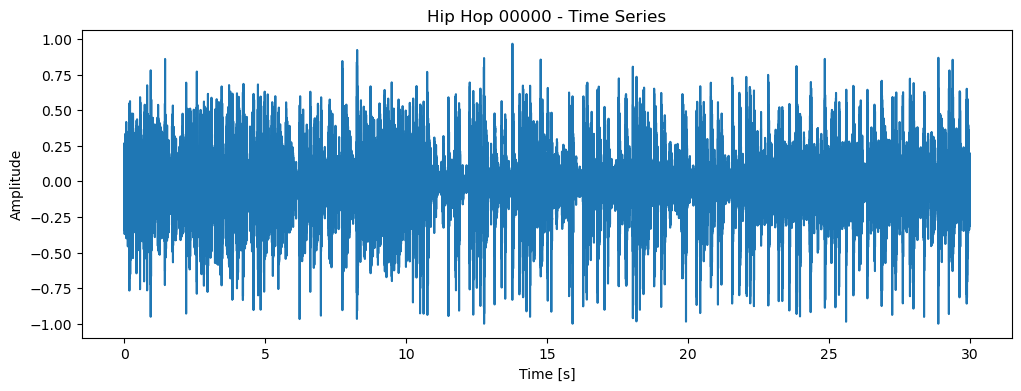

In [ ]:
# To visualize a waveform for hip hop sample:
waveform, genre, sample_rate = (
    df_ts.loc[400]["waveform"],
    df_ts.loc[400]["y"],
    df_ts.loc[400]["sample_rate"],
)

duration = waveform.shape[0] / sample_rate
time = np.linspace(0.0, duration, waveform.shape[0])

# Plot the time series:
plt.figure(figsize=(12, 4))
plt.plot(time, waveform)
plt.title("Hip Hop 00000 - Time Series")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

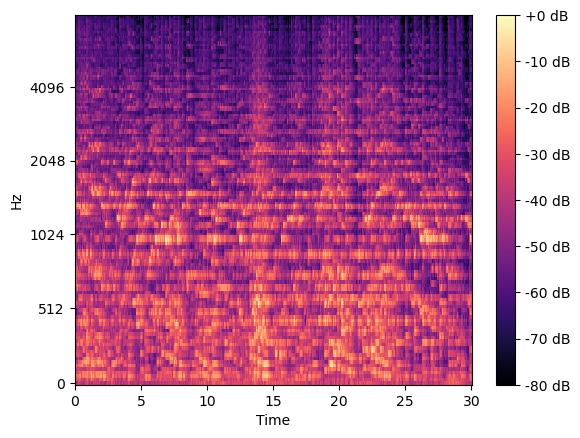

In [ ]:
# Produce original and resized spectrogram for same classical track
import matplotlib.pyplot as plt
import numpy as np

data_c, sample_rate_c = librosa.load(
    f"~/Downloads/data/genres_original/classical/classical.00000.wav"
)

S_classical = librosa.feature.melspectrogram(
    y=data_c, sr=sample_rate_c, n_mels=128, n_fft=2048, hop_length=512, fmax=8000
)

S_dB_c = librosa.power_to_db(S_classical, ref=np.max)
resized_c = cv2.resize(S_dB_c, (128, 128))

fig, ax = plt.subplots()
# S_dB_norm = (S_dB - S_dB.min()) / (S_dB.max() - S_dB.min())

img = librosa.display.specshow(
    S_dB_c,
    x_axis="time",
    y_axis="mel",
    sr=sample_rate_c,
    ax=ax,
    hop_length=512,
    fmax=8000,
)
fig.colorbar(img, ax=ax, format="%+2.0f dB")
# ax.set(title="Mel-frequency spectrogram")

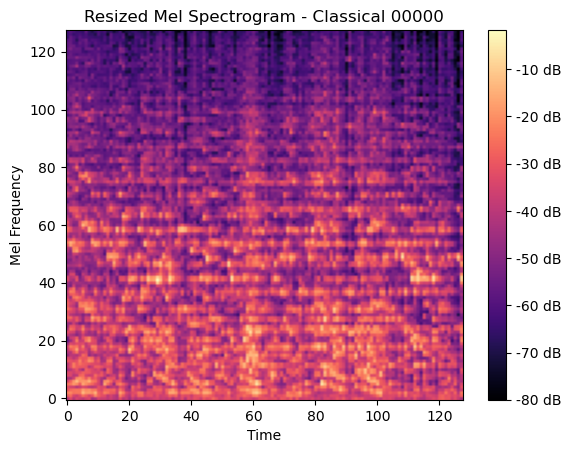

In [23]:
plt.imshow(resized_c, aspect="auto", origin="lower", cmap="magma")
plt.colorbar(format="%+2.0f dB")
plt.title("Resized Mel Spectrogram - Classical 00000")
plt.xlabel("Time")
plt.ylabel("Mel Frequency")
plt.show()

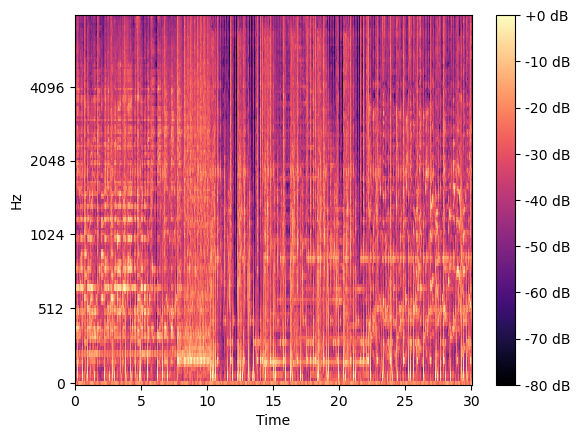

In [ ]:
#Produce original and resized spectrogram for same hip hop track
data_h, sample_rate_h = librosa.load(f"~/Downloads/data/genres_original/hiphop/hiphop.00000.wav")

S_hip = librosa.feature.melspectrogram(
    y=data_h, sr=sample_rate_h, n_mels=128, n_fft=2048, hop_length=512, fmax=8000
)

S_dB_h = librosa.power_to_db(S_hip, ref=np.max)
resized_h = cv2.resize(S_dB_h, (128, 128))

fig, ax = plt.subplots()
# S_dB_norm = (S_dB - S_dB.min()) / (S_dB.max() - S_dB.min())

img = librosa.display.specshow(
    S_dB_h,
    x_axis="time",
    y_axis="mel",
    sr=sample_rate_h,
    ax=ax,
    hop_length=512,
    fmax=8000,
)
fig.colorbar(img, ax=ax, format="%+2.0f dB")

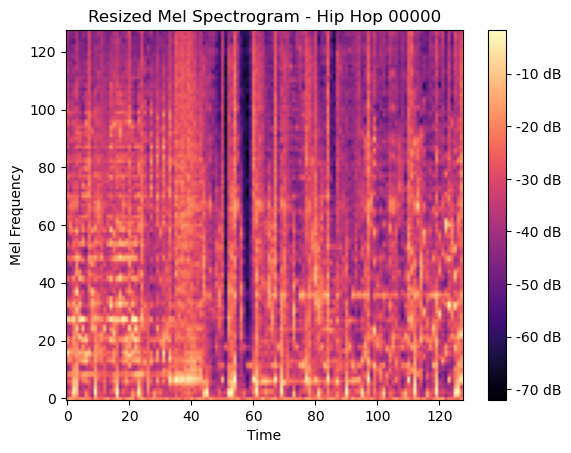

In [21]:
plt.imshow(resized_h, aspect="auto", origin="lower", cmap="magma")
plt.colorbar(format="%+2.0f dB")
plt.title("Resized Mel Spectrogram - Hip Hop 00000")
plt.xlabel("Time")
plt.ylabel("Mel Frequency")
plt.show()

Old Stuff

In [19]:
df_ts = pd.DataFrame({"waveform": waveform, "genre": genre, "sample_rate": sr})
df_ts.head()

,waveform,genre,sample_rate
0,"[0.0073242188, 0.016601562, 0.0076293945, -0.0...",blues,22050
1,"[0.0034179688, 0.0043029785, 0.001373291, 0.00...",blues,22050
2,"[0.019012451, 0.047698975, 0.029418945, -0.018...",blues,22050
3,"[-0.013000488, -0.03060913, -0.036071777, -0.0...",blues,22050
4,"[-0.0063171387, -0.009277344, -0.008331299, -0...",blues,22050


In [9]:
data, sample_rate = librosa.load(f"data/genres_original/blues/blues.00000.wav")

S = librosa.feature.melspectrogram(
    y=data, sr=sample_rate, n_mels=128, n_fft=2048, hop_length=512, fmax=8000
)
S

array([[8.8268799e-01, 8.9119792e-01, 5.1211077e-01, ..., 1.5947603e+00,
        2.1680443e+00, 1.6678190e+01],
       [2.2305069e+00, 4.1655021e+00, 4.5266399e+00, ..., 8.1707211e+00,
        1.7254709e+01, 3.7458706e+01],
       [6.9113249e-01, 7.1795809e-01, 3.5434721e+00, ..., 4.6220841e+00,
        3.3292946e+01, 3.1175535e+01],
       ...,
       [5.3926464e-04, 1.2663329e-03, 2.6247166e-03, ..., 1.3400511e-03,
        2.3673696e-03, 2.6777522e-03],
       [1.9684255e-04, 5.8042654e-04, 1.8922262e-03, ..., 4.2267016e-04,
        1.3099413e-03, 2.0431615e-03],
       [9.1946844e-05, 3.8242034e-04, 1.6103965e-03, ..., 4.0689029e-04,
        1.4513478e-03, 1.4910798e-03]], dtype=float32)

In [10]:
import cv2
import numpy as np

S_dB = librosa.power_to_db(S, ref=np.max)
resized = cv2.resize(S_dB, (128, 128))

In [11]:
resized.shape

(128, 128)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

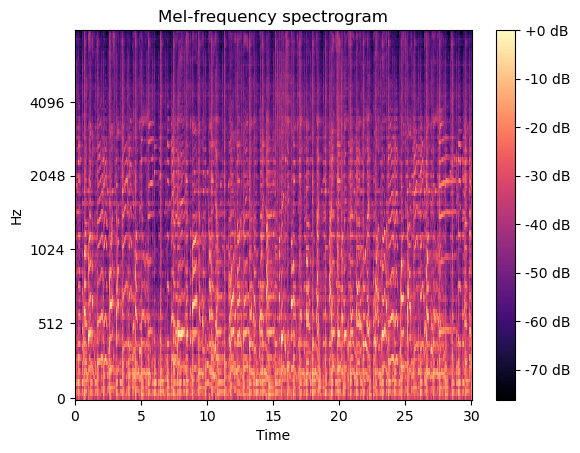

In [12]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
# S_dB_norm = (S_dB - S_dB.min()) / (S_dB.max() - S_dB.min())

img = librosa.display.specshow(
    S_dB,
    x_axis="time",
    y_axis="mel",
    sr=sr[0],
    ax=ax,
    hop_length=512,
    fmax=8000,
)
fig.colorbar(img, ax=ax, format="%+2.0f dB")
ax.set(title="Mel-frequency spectrogram")

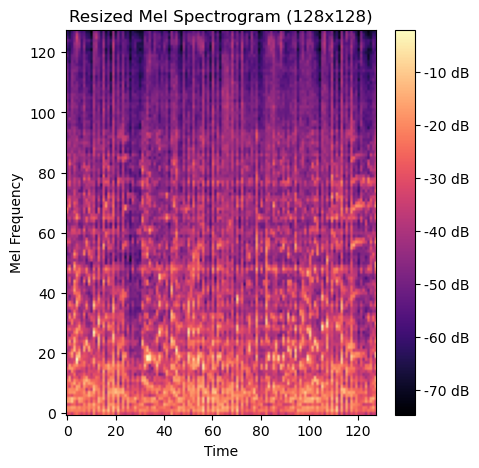

In [13]:
plt.figure(figsize=(5, 5))  # optional: set figure size
plt.imshow(resized, aspect="auto", origin="lower", cmap="magma")
plt.colorbar(format="%+2.0f dB")
plt.title("Resized Mel Spectrogram (128x128)")
plt.xlabel("Time")
plt.ylabel("Mel Frequency")
plt.show()

In [14]:
S_norm = (resized - np.min(resized)) / (np.max(resized) - np.min(resized))

# Apply a colormap (e.g., 'magma')
colormap = plt.get_cmap("magma")
S_rgb = colormap(S_norm)  # This returns an (128, 128, 4) array — RGBA

# Drop the alpha channel to get (128, 128, 3)
S_rgb = S_rgb[:, :, :3]

In [15]:
S_rgb.shape

(128, 128, 3)